In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers

상관계수 :  [[1.         0.98084935]
 [0.98084935 1.        ]]


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 0.1175 - mse: 0.1175
[0.1175018921494484, 0.1175018921494484]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
pred :  [1.0368221 1.930409  2.8231044 3.7158    4.608496 ]
real :  [1.2 2.  3.  3.5 5.3]
결정계수 :  0.939927485939498


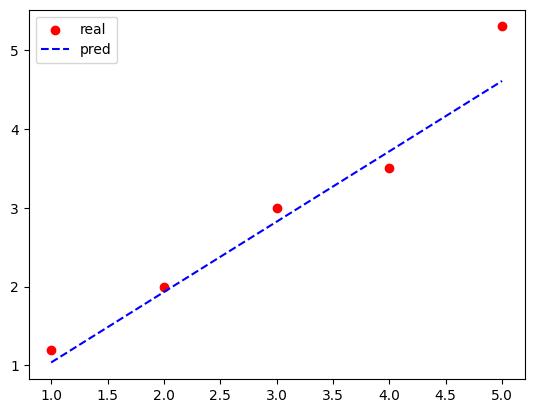

In [15]:
x_data = np.array([1., 2., 3., 4., 5.]).reshape(-1, 1)
y_data = np.array([1.2, 2.0, 3.0, 3.5, 5.3]).reshape(-1, 1)
print('상관계수 : ', np.corrcoef(x_data.ravel(), y_data.ravel())) # 차원 하향시켜 출력

model = Sequential()
model.add(Input(shape = (1,)))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
print(model.summary())

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])
model.fit(x_data, y_data, batch_size = 1, epochs = 10, verbose = 0, shuffle = True)
print(model.evaluate(x_data, y_data))

pred = model.predict(x_data)
print('pred : ', pred.ravel())
print('real : ', y_data.ravel())

# 결정계수
from sklearn.metrics import r2_score
print('결정계수 : ', r2_score(y_data, pred))

# 시각화
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data, color = 'r', marker = 'o', label = 'real')
plt.plot(x_data, pred, 'b--', label = 'pred')
plt.legend()
plt.show()